# Naive Bayes Tensorflow

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.2.0


Carga y prepara los datos [MNIST dataset](http://yann.lecun.com/exdb/mnist/). 

In [12]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.reshape((-1,784))
x_test=x_test.reshape((-1,784))

Entrena un modelo generativo multinomial:

In [5]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

mnb = MultinomialNB()
y_pred_naive_multinomial = mnb.fit(x_train, y_train).predict(x_test)

Entrena un modelo generativo gaussiano:

In [6]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
gnb = GaussianNB()
y_pred_naive_gaussian = gnb.fit(x_train_norm, y_train).predict(x_test_norm)

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization


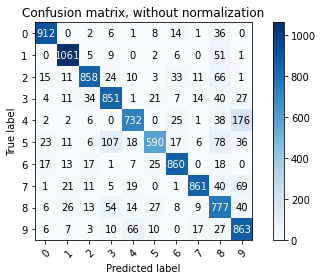

In [8]:
import numpy as np

plot_confusion_matrix(y_test,y_pred_naive_multinomial,classes=np.unique(y_train))

Confusion matrix, without normalization


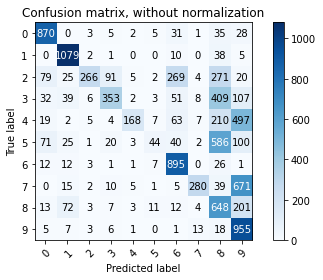

In [9]:
plot_confusion_matrix(y_test,y_pred_naive_gaussian,classes=np.unique(y_train))

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_naive_multinomial))


              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.91      0.93      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.80      0.84      0.82      1010
           4       0.84      0.75      0.79       982
           5       0.86      0.66      0.75       892
           6       0.89      0.90      0.89       958
           7       0.94      0.84      0.88      1028
           8       0.66      0.80      0.72       974
           9       0.71      0.86      0.78      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [11]:
print(classification_report(y_test, y_pred_naive_gaussian))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



# Naive Bayes  Tensorflow Probability

In [216]:
import tensorflow as tf
import tensorflow_probability as tfp
import tensorflow.keras as keras
tfd = tfp.distributions


# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train=x_train.reshape((-1,784))
x_test=x_test.reshape((-1,784))
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [217]:
x_train.shape

(60000, 784)

In [218]:
x_train_binary=(x_train>128).astype(np.int)
x_test_binary=(x_test>128).astype(np.int)


In [16]:
def get_prior(y):
    probs=[np.sum(y==c_k)/len(y) for c_k in np.unique(y)]
    print('The class priors are {}'.format(np.sum(probs)))
    priors=tfd.Categorical(probs=probs)
    return priors

In [219]:
prior=get_prior(y_train)

The class priors are 1.0000000000000002


In [220]:
prior

<tfp.distributions.Categorical 'Categorical' batch_shape=[] event_shape=[] dtype=int32>

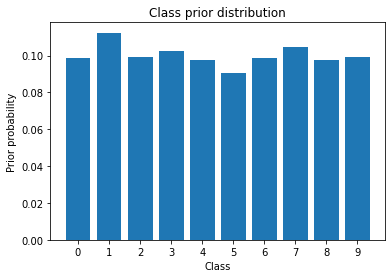

In [124]:
labels=np.unique(y_train)
plt.bar(range(10), prior.probs.numpy())
plt.xlabel("Class")
plt.ylabel("Prior probability")
plt.title("Class prior distribution")
plt.xticks(range(10), labels)
plt.show()

Los datos originales de las imagenes contienen regiones donde siempre los valores son cero. Una forma de suavizar la estimacion de probabilidades condicionales es usar suavizado de Laplace (https://en.wikipedia.org/wiki/Additive_smoothing)

In [106]:
def laplace_smoothing(binary_data,labels,alpha=1):
    n_pixels=binary_data.shape[1]
    n_classes=len(np.unique(labels))
    theta = np.zeros([n_classes, n_pixels])
    for c_k in range(n_classes):
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of pixels in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)
    return theta

In [201]:
theta=laplace_smoothing(x_train_binary,y_train,1)

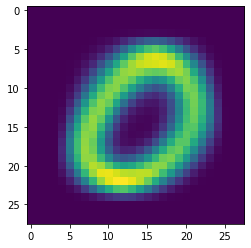

In [202]:
plt.imshow(theta[0].reshape((28,28)))

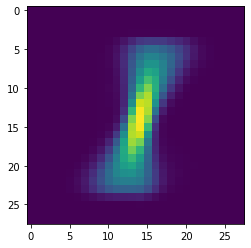

In [203]:
plt.imshow(theta[1].reshape((28,28)))

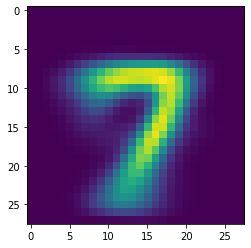

In [204]:
plt.imshow(theta[7].reshape((28,28)))

In [205]:
def get_class_conditionals(probs):
    class_conditionals=tfd.Bernoulli(probs=probs)
    return class_conditionals

In [206]:
class_conditionals=get_class_conditionals(theta)

In [234]:
class_conditionals

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[10, 784] event_shape=[] dtype=int32>

In [207]:
digits_sample=class_conditionals.sample(1).numpy()

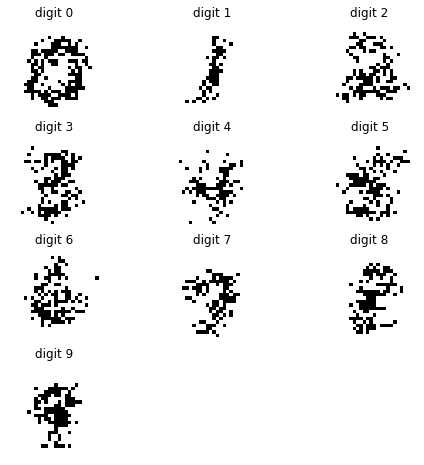

In [233]:
rows=4
cols=3
titles = ['digit 0','digit 1', 'digit 2',
         'digit 3','digit 4', 'digit 5',
         'digit 6','digit 7', 'digit 8',
         'digit 9']
axes=[]
fig=plt.figure(figsize=(8,8))
for i in range(len(titles)):
    mv_samples = digits_sample[:,i,:] #take the ith batch [samples x event_shape]
    axes.append( fig.add_subplot(rows, cols, i+1) )
    subplot_title=(titles[i])
    axes[-1].set_title(subplot_title)  
    plt.imshow(mv_samples.reshape([28,28]), cmap='Greys')
    plt.axis('off')
plt.show()

In [209]:
def predict_sample(prior, class_conditionals, sample):
    cond_probs = class_conditionals.log_prob(sample)
    prior_probs=prior.logits_parameter()
    joint_likelihood = tf.add(prior_probs, tf.reduce_sum(cond_probs,axis=1))
    norm_factor = tf.math.reduce_logsumexp(joint_likelihood, axis=-1, keepdims=True)
    log_prob = joint_likelihood - norm_factor
    return tf.math.exp(log_prob).numpy()

In [210]:
prob=predict_sample(prior,class_conditionals,x_test_binary[0])

In [211]:
prob.argmax()

7

In [212]:
y_test[0]

7

In [213]:
def predict_class(prior, class_conditionals, x):
    pred=[]
    for sample in x:
        prob=predict_sample(prior, class_conditionals,sample)
        pred.append(prob.argmax())
    return pred

In [214]:
y_pred_tfp=predict_class(prior, class_conditionals, x_test_binary)

In [231]:
print(classification_report(y_test, y_pred_tfp))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       980
           1       0.89      0.95      0.92      1135
           2       0.89      0.82      0.85      1032
           3       0.79      0.83      0.81      1010
           4       0.84      0.81      0.83       982
           5       0.79      0.74      0.76       892
           6       0.89      0.89      0.89       958
           7       0.92      0.84      0.88      1028
           8       0.76      0.78      0.77       974
           9       0.75      0.84      0.79      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



Confusion matrix, without normalization


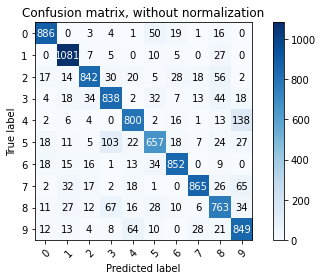

In [230]:
plot_confusion_matrix(y_test,y_pred_tfp,classes=np.unique(y_train))